### Predicting Quality of Patient Care with Logistic Regression

Based on MIT's OpenCourseWare [Unit 3](https://ocw.mit.edu/courses/sloan-school-of-management/15-071-the-analytics-edge-spring-2017/logistic-regression/) on Logistic Regression

In [1]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import train_test_split
import pandas as pd
import seaborn as sns

In [2]:
import sklearn
print(f'scikit-learn version: {sklearn.__version__}')
print(f'pandas version: {pd.__version__}')
print(f'seaborn version: {sklearn.__version__}')

scikit-learn version: 0.23.2
pandas version: 1.1.0
seaborn version: 0.23.2


**Metadata:**

- **MemberID** numbers the patients from 1 to 131, and is just an identifying number.
- **InpatientDays** is the number of inpatient visits, or number of days the person spent in the hospital.
- **ERVisits** is the number of times the patient visited the emergency room.
- **OfficeVisits** is the number of times the patient visited any doctor's office.
- **Narcotics** is the number of prescriptions the patient had for narcotics.
- **DaysSinceLastERVisit** is the number of days between the patient's last emergency room visit and the end of the study period (set to the length of the study period if they never visited the ER). 
- **Pain** is the number of visits for which the patient complained about pain.
- **TotalVisits** is the total number of times the patient visited any healthcare provider.
- **ProviderCount** is the number of providers that served the patient.
- **MedicalClaims** is the number of days on which the patient had a medical claim.
- **ClaimLines** is the total number of medical claims.
- **StartedOnCombination** is whether or not the patient was started on a combination of drugs to treat their diabetes (TRUE or FALSE).
- **AcuteDrugGapSmall** is the fraction of acute drugs that were refilled quickly after the prescription ran out.
- **PoorCare** is the outcome or dependent variable, and is equal to 1 if the patient had poor care, and equal to 0 if the patient had good care.

### Let's read in our sample claims data: ```quality.csv```

In [3]:
df = pd.read_csv('../data/quality.csv')

### Number of (rows, columns) in our data set:

In [4]:
df.shape

(131, 14)

### First 5 rows of our data

In [5]:
df.head()

,MemberID,InpatientDays,ERVisits,OfficeVisits,Narcotics,DaysSinceLastERVisit,Pain,TotalVisits,ProviderCount,MedicalClaims,ClaimLines,StartedOnCombination,AcuteDrugGapSmall,PoorCare
0,1,0,0,18,1,731.0,10,18,21,93,222,False,0,0
1,2,1,1,6,1,411.0,0,8,27,19,115,False,1,0
2,3,0,0,5,3,731.0,10,5,16,27,148,False,5,0
3,4,0,1,19,0,158.0,34,20,14,59,242,False,0,0
4,5,8,2,19,3,449.0,10,29,24,51,204,False,0,0


### Basic Summary Statistics

In [6]:
df.describe()

,MemberID,InpatientDays,ERVisits,OfficeVisits,Narcotics,DaysSinceLastERVisit,Pain,TotalVisits,ProviderCount,MedicalClaims,ClaimLines,AcuteDrugGapSmall,PoorCare
count,131.000000,131.000000,131.000000,131.000000,131.000000,131.000000,131.000000,131.000000,131.000000,131.000000,131.000000,131.000000,131.000000
mean,66.000000,2.717557,1.496183,13.229008,4.572519,480.567112,15.557252,17.442748,23.984733,43.244275,142.862595,2.694656,0.251908
std,37.960506,5.099434,2.167501,9.077076,9.713615,274.767240,20.418001,12.298318,13.670285,28.886540,91.629921,6.983379,0.435775
min,1.000000,0.000000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,5.000000,11.000000,20.000000,0.000000,0.000000
25%,33.500000,0.000000,0.000000,7.000000,0.000000,206.958333,1.000000,8.000000,15.000000,25.500000,83.500000,0.000000,0.000000
50%,66.000000,0.000000,1.000000,12.000000,1.000000,640.958333,8.000000,15.000000,20.000000,37.000000,120.000000,1.000000,0.000000
75%,98.500000,3.000000,2.000000,18.500000,3.000000,731.000000,23.000000,22.500000,30.000000,49.500000,185.000000,3.000000,0.500000
max,131.000000,30.000000,11.000000,46.000000,59.000000,731.000000,104.000000,69.000000,82.000000,194.000000,577.000000,71.000000,1.000000


### Remember, poor care of ```0``` denotes "good care", ```1``` denotes "poor care":

In [7]:
df['PoorCare'].value_counts()

0    98
1    33
Name: PoorCare, dtype: int64

In [8]:
df['PoorCare'].value_counts(normalize=True)

0    0.748092
1    0.251908
Name: PoorCare, dtype: float64

About 75% of patients receive good care, 25% receive poor care.

### Let's say we're interested in the relationship between # of prescription narcotics prescribed versus # of office visits and see how that influences quality of care 

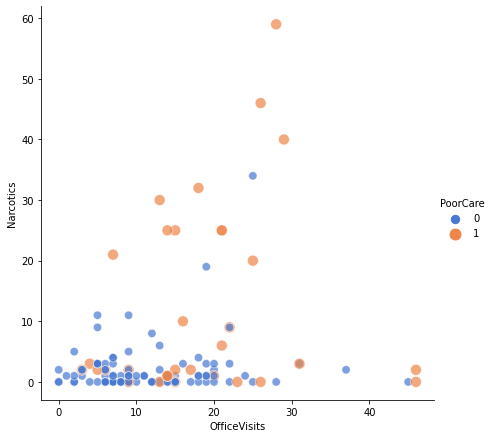

In [12]:
# I decided to alter the size of the circles to make the poor care data points stand out by
# making them much larger than the good care data points.  Seaborn make this pretty easy by
# just passing in the size= and sizes= parameters
sns.relplot(x="OfficeVisits", y="Narcotics", hue="PoorCare", alpha=0.7, size="PoorCare", sizes=[70,120], palette="muted", height=6, data=df);

#### We can sort of deduce from the scatter plot above based on where the orange circles are located (poor care) that it seems that the more office visits a patient as and the more prescription narcotics a patient is being prescribed, the more likely they will have poor quality of care

### Let's predict the outcome of quality of care using Logistic Regression (it is a supervised learning classification algorithm) using ```PoorCare``` as the outcome/dependent/target variable and ```OfficeVisits```/```Narcotics``` as the explanatory/independent/features variables

#### Define target or dependent variable ```y```:

In [13]:
y = df['PoorCare']

#### Define features ```X``` or independent variables:

In [14]:
X = df[['OfficeVisits','Narcotics']]

#### Create training and test data sets

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=777)

In [17]:
y_train.value_counts(normalize=True)

0    0.755102
1    0.244898
Name: PoorCare, dtype: float64

In [18]:
y_test.value_counts(normalize=True)

0    0.727273
1    0.272727
Name: PoorCare, dtype: float64

#### Create logistic regression classifier

In [ ]:
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

#### Make prediction on test features or test independent/explanatory variables

In [ ]:
log_reg.predict(X_test)

#### Accuracy score

In [ ]:
log_reg.score(X_test, y_test)

#### Create Confusion Matrix

In [ ]:
cmatrix = plot_confusion_matrix(log_reg, X_test, y_test, cmap='Blues', values_format='d')

- 22 patients with actual good care and predicted with good care
- 5 patients with actual poor care and predicted with poor care
- 4 patients with actual poor care, but predicted as good care
- 2 patients with actual good care, but predicted as poor care

$sensitivity = \frac{TP}{TP + FN} = \frac{TP}{sum \space of \space bottom \space row} = \frac{5}{9} = 0.56$

$specificity = \frac{TN}{TN + FP} = \frac{TN}{sum \space of \space top \space row} = \frac{22}{24} = 0.92$

In [ ]:
cmatrix.confusion_matrix